# What is Regression?
__Regression__ is the process of estimating the relationship between input and output variables. One thing to note is that the output variables are continuous-valued real numbers. Hence there are an infinite number of possibilities. This is in contrast with classification, where the number of output classes is fixed. The classes belong to a finite set of possibilities.

In regression, it is assumed that the output varables depend on the input variables, so we want to see how they are related. Consequently, the input variables are called independent variables also known as predictors, and output variables are called dependent variables, independent of each other. There are a lot of situations where there are correlations between input variables.

Regression analysis helps us in understanding how the value of the output variable changes when we vary some input variables while keeping other input variables fixed. In linear regression, we assume that the relationship between input and output is linear. This puts a constraint on our modeling procedure, but it's fast and efficient.

Sometimes, linear regression is not sufficient to explain the relationship between input and output. Hence we use polynomial regression where we use a polynomial to explain the relationship between input and output. This is more computationally complex, but gives higher accuracy. Depending on the problem at hand, we use different forms of regression to extract the relationship. Regression is frequently used for prediction of prices, economics, variations, and so on.

# Building a single variable regressor

In [1]:
import pickle

import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

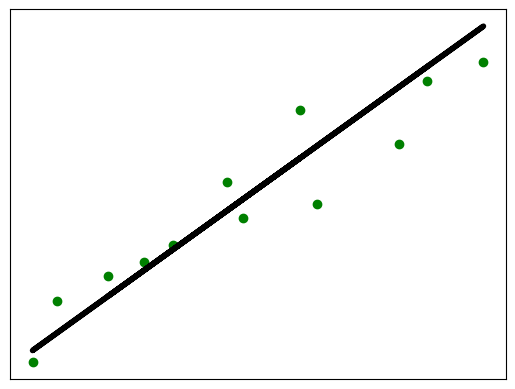

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86

New mean absolute error = 0.59


In [3]:
# Input file containing data
input_file = 'data_singlevar_regr.txt'

# Read data
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Train and test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train, y_train = X[:num_training], y[:num_training]

# Test data
X_test, y_test = X[num_training:], y[num_training:]

# Create linear regressor object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Predict the output
y_test_pred = regressor.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

# Model persistence
output_model_file = 'model.pkl'

with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

# Load the model
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)
    
# Perform prediction on test data
y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))